In [6]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import matplotlib.animation as animation

import pandas as pd
from datetime import date
from datetime import timedelta 
import datetime

data_table = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_2019-ncov-Confirmed.csv')

## Most recent map

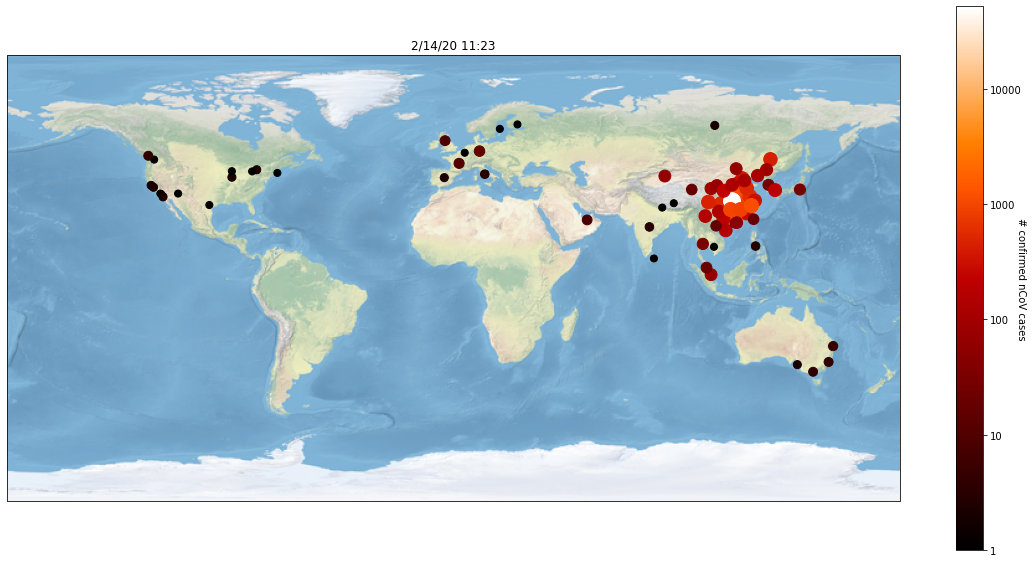

In [17]:
plt.figure(figsize=(20,20))
#yesterday = date.strftime(datetime.date(2020,2,14),"%m/%d/%y")
#yesterday = yesterday.lstrip('0').replace('/0','/')
yesterday = data_table.columns[-1]
ax = plt.axes(projection=ccrs.PlateCarree())
crv_map = ax.scatter(data_table.get('Long').tolist(),data_table.get('Lat').tolist(),s=(np.log10(data_table.get(yesterday).tolist())+1)*50, c=np.log10(data_table.get(yesterday).tolist()),cmap='gist_heat')
plt.title(yesterday)
cbar = plt.colorbar(crv_map, shrink=0.5)
cbar.ax.set_yticklabels(['1','10','100','1000','10000'])
cbar.set_label('# confirmed nCoV cases', rotation=270)
ax.stock_img()
plt.savefig('coronamap.png', orientation = 'landscape')
plt.show()

## Animation

In [18]:
def get_data(table,title):
    data = pd.DataFrame(data_table[title]).astype(float)
    data.columns = {title}
    return data

In [19]:
title = yesterday
d = get_data(data_table,title)
lat = data_table['Lat']
long = data_table['Long']
days = data_table.columns[4:]
daily_cases = pd.DataFrame(data=d)
coordinates = pd.DataFrame(data = [lat,long]).transpose()
merged = pd.concat((coordinates,daily_cases), axis=1)


In [46]:
Writer = animation.FFMpegWriter
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

Text(0.5, 1.0, '1/21/20 22:00')

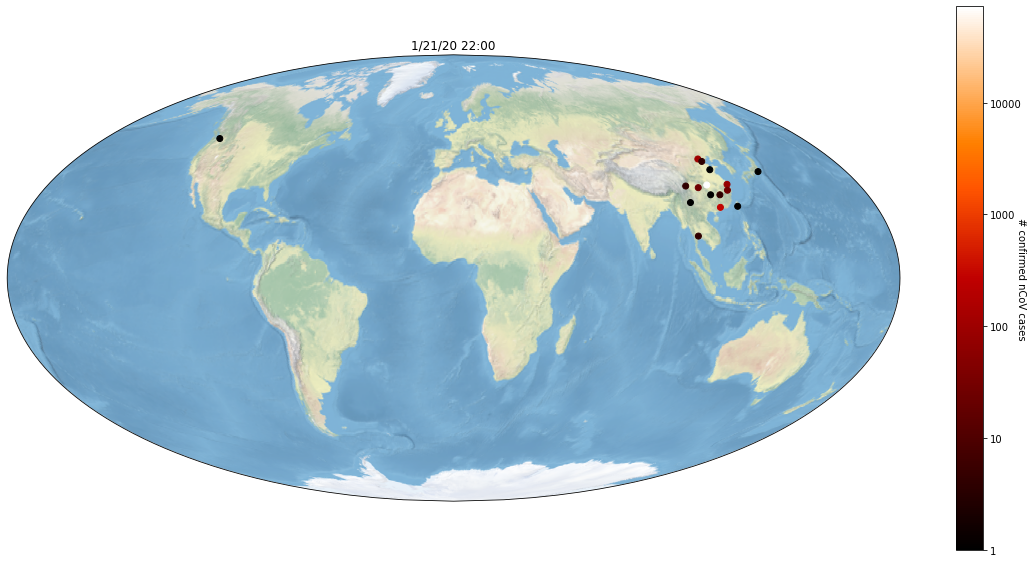

In [47]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
base_data = plt.scatter(long, lat,c = np.log10(data_table[days[0]]), cmap='gist_heat', transform=ccrs.PlateCarree())
cbar = plt.colorbar(mappable=base_data, shrink=0.5)
cbar.set_label('# confirmed nCoV cases', rotation=270)
cbar.ax.set_yticklabels(['1','10','100','1000','10000'])
ax.set_title(days[0])

In [48]:
def animate(i):
    data = data_table[days[i+1]] #select data range
    crv_map = ax.scatter(long,lat,s=(np.log10(data)+1)*50, c=np.log10(data),cmap='gist_heat', transform=ccrs.PlateCarree())
    ax.set_title(days[i+1])

In [49]:
ani = animation.FuncAnimation(fig, animate, frames=days.shape[0]-2, repeat=True)

In [51]:
filename = 'coronavirus.gif'
ani.save(filename, writer=writer)

MovieWriter stderr:
[gif @ 0x7f944d808800] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1440x1440', '-pix_fmt', 'rgba', '-r', '20', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '1800k', '-metadata', 'artist=Me', '-y', 'coronavirus.gif']' returned non-zero exit status 1.

## By Region

In [264]:
regional_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv')

In [289]:
regionalized = regional_data.groupby('WHO region').sum()
days2 = regionalized.columns[:-4]

Text(0.5, 0, '# Confirmed Coronavirus Cases')

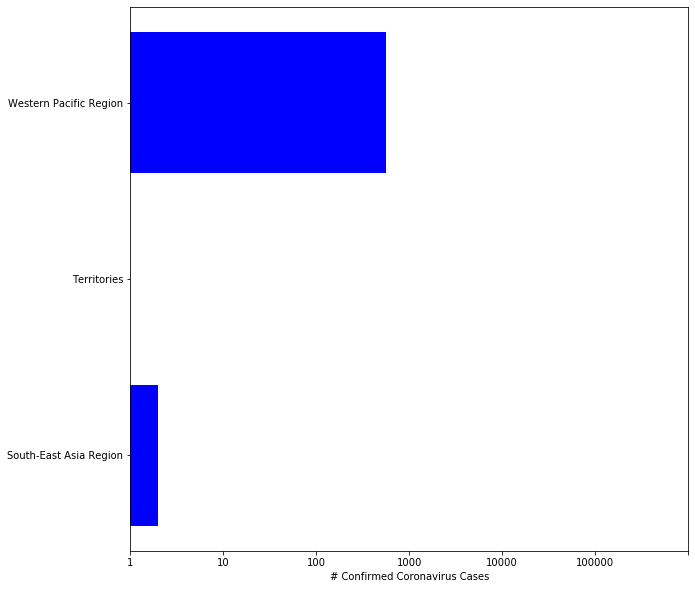

In [347]:
[fig2, ax] = plt.subplots(figsize=(10,10))
ax.barh(regionalized.index,np.log10(regionalized[days2[0]]),color='b')
ax.set_xlim([0,6])
ax.set_xticklabels(['1','10','100','1000','10000','100000'])
ax.set_xlabel('# Confirmed Coronavirus Cases')

In [348]:
def animate2(i):
    barplot = ax.barh(regionalized.index,np.log10(regionalized[days2[i+1]]),color='b')
    ax.set_title(days[i])

In [349]:
ani2 = animation.FuncAnimation(fig2, animate2, frames=days2.shape[0]-1, repeat=True)

In [350]:
ani2.save('coronavirus_regional.gif')

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
